## Feature Selection Comparison:
1. Load UCI Credit dataset.
2. Create noisy data with make classification.
3. Try different Feature selection algorithms.
4. Compare results.
5. Conclusion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import shap
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from stability_selection import StabilitySelection, plot_stability_path
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import cross_val_score,cross_validate
from xgboost import XGBClassifier

### 1. Read UCI Credit Card and add noise.

In [2]:
data = pd.read_csv("data/UCI_Credit_Card.csv")
data.head(5)
data["default.payment.next.month"]=data["default.payment.next.month"].apply(lambda x : int(x))
data.rename(columns={'default.payment.next.month':'target'},inplace=True)
y_uci = data["target"].values
X_uci_df = data.drop(columns=['ID','target'])
print(f"UCI dataset shape: {X_uci_df.shape}")
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X_art, y_art = make_classification(n_samples=30000,
                           n_features=10,
                           n_informative=5,
                           n_redundant=3,
                           n_repeated=2,
                           n_classes=2,
                           random_state=456,
                           shuffle=True)

X_art_df = pd.DataFrame(data=X_art)
X_art_df=X_art_df.add_prefix("arti_")

#Merging dataframes :
X = pd.concat([X_uci_df,X_art_df],axis=1)
y = y_uci
print(f"UCI dataset shape after concatenation : {X.shape}")
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3,random_state=345)
X.head()

UCI dataset shape: (30000, 23)
UCI dataset shape after concatenation : (30000, 33)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,arti_0,arti_1,arti_2,arti_3,arti_4,arti_5,arti_6,arti_7,arti_8,arti_9
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,3.609003,-3.501360,-1.397978,0.633272,-1.454712,-1.397978,-0.770617,0.633272,-1.609000,0.589507
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3.264413,-1.497532,0.589626,1.880331,-2.103931,0.589626,-2.549066,1.880331,-1.048928,0.308160
2,90000.0,2,2,2,34,0,0,0,0,0,...,3.682927,-3.949155,-2.268057,0.060678,-0.099712,-2.268057,-0.970887,0.060678,-1.704405,1.010888
3,50000.0,2,2,1,37,0,0,0,0,0,...,3.514225,-3.422135,-1.339164,1.757385,-0.900735,-1.339164,-1.889848,1.757385,0.190783,2.368423
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,-2.711377,0.638811,-1.653678,-2.084054,2.340673,-1.653678,1.925549,-2.084054,1.892363,0.530124


### 2.Stability Selection:

Fitting estimator for lambda = 2.00000 (1 / 8) on 100 bootstrap samples


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    7.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting estimator for lambda = 3.00000 (2 / 8) on 100 bootstrap samples


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    5.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting estimator for lambda = 4.00000 (3 / 8) on 100 bootstrap samples


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    5.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting estimator for lambda = 5.00000 (4 / 8) on 100 bootstrap samples


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    5.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting estimator for lambda = 6.00000 (5 / 8) on 100 bootstrap samples


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    5.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting estimator for lambda = 7.00000 (6 / 8) on 100 bootstrap samples


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    5.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting estimator for lambda = 8.00000 (7 / 8) on 100 bootstrap samples


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    5.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting estimator for lambda = 9.00000 (8 / 8) on 100 bootstrap samples


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    6.0s finished


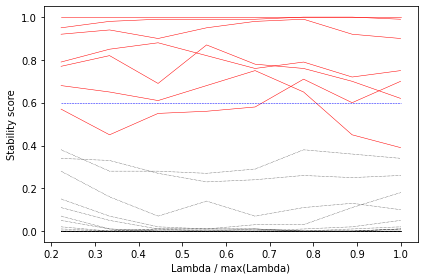

In [3]:
base_estimator = Pipeline([
    ('model', RandomForestClassifier(max_depth=2,n_estimators=10,n_jobs=4))])
selector = StabilitySelection(base_estimator=base_estimator,
                              lambda_name='model__max_depth',
                              n_bootstrap_iterations=100,
                              n_jobs=4,
                              lambda_grid=np.arange(2,10,step=1),
                              verbose=1)
selector.fit(X_train,y_train)

fig, ax = plot_stability_path(selector)
fig.show()

selected_variables = selector.get_support(indices=True)
selected_scores = selector.stability_scores_.max(axis=1)

In [4]:
# Print the names of the most important features
ss_flist = []
for feature_list_index in selector.get_support(indices=True):
    print(f'Variable Name : {X.columns[feature_list_index]} \t Stability Score :{selected_scores[feature_list_index]}')
    ss_flist.append(X.columns[feature_list_index])
    

Variable Name : PAY_0 	 Stability Score :1.0
Variable Name : PAY_2 	 Stability Score :1.0
Variable Name : PAY_3 	 Stability Score :0.99
Variable Name : PAY_4 	 Stability Score :0.88
Variable Name : PAY_5 	 Stability Score :0.87
Variable Name : PAY_6 	 Stability Score :0.75
Variable Name : PAY_AMT1 	 Stability Score :0.71


### 3.SHAP Feature Importances

In [5]:
# Build the model with the random forest regression algorithm:
model = RandomForestClassifier(max_depth=4, random_state=456, n_estimators=20)
model.fit(X_train,y_train)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train,y_train,check_additivity=False)

shap_vals= np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(X.columns, sum(shap_vals))), columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)
shap_flist = list(feature_importance.col_name[0:7])
print(shap_flist)

['PAY_0', 'PAY_2', 'PAY_3', 'PAY_5', 'LIMIT_BAL', 'PAY_4', 'PAY_AMT1']


### 4.MLXtend SFS

In [6]:
sfs1 = SFS(model, 
           k_features=(3,10), 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='roc_auc',
           n_jobs=4,
           cv=3)

sfs1 = sfs1.fit(X_train, y_train)
sfs1_flist=list(sfs1.k_feature_names_)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  26 out of  33 | elapsed:    2.1s remaining:    0.6s
[Parallel(n_jobs=4)]: Done  33 out of  33 | elapsed:    2.5s finished

[2020-04-10 00:07:01] Features: 1/10 -- score: 0.7122847987257677[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 out of  32 | elapsed:    2.3s finished

[2020-04-10 00:07:04] Features: 2/10 -- score: 0.7450352477150837[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  31 out of  31 | elapsed:    2.5s finished

[2020-04-10 00:07:06] Features: 3/10 -- score: 0.755154984255357[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    2.8s finished

[2020-04-10 00:07:09] Features: 4/10 -- score: 0.7615940392481751[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[P

### 5.Combine selected features.

In [23]:
total_fs_list=list(set(sfs1_flist+ss_flist+shap_flist))

fs_method_list = [("SS",ss_flist),
                  ("SFS",sfs1_flist),
                  ("SHAP",shap_flist),
                  ("FSP",total_fs_list),
                  ("All Columns",list(X.columns))]

result_df = pd.DataFrame()

# xgb_params={'n_estimators': 284, 'max_depth': 18, 
#             'min_child_weight': 6, 'scale_pos_weight': 66, 
#             'subsample': 0.8, 'colsample_bytree': 0.8}

for feature_list in fs_method_list:
    
    print(f'Features selected with {feature_list[0]} : {feature_list[1]} \n')
    X_fs = X[feature_list[1]]
    clf = XGBClassifier()
    scores = cross_validate(clf,X_fs,y,cv=5,scoring='roc_auc',return_train_score=True)
    
    result_df[f'{feature_list[0]}_mean_train_score']=scores['train_score']
    result_df[f'{feature_list[0]}_mean_test_score']=scores['test_score']
    result_df[f'{feature_list[0]}_mean_overfit']=(scores['train_score']-scores['test_score'])


Features selected with SS : ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1'] 

Features selected with SFS : ['LIMIT_BAL', 'EDUCATION', 'PAY_0', 'PAY_3', 'PAY_4', 'PAY_6', 'BILL_AMT1', 'BILL_AMT3', 'PAY_AMT1', 'PAY_AMT2'] 

Features selected with SHAP : ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_5', 'LIMIT_BAL', 'PAY_4', 'PAY_AMT1'] 

Features selected with FSP : ['PAY_3', 'PAY_4', 'PAY_AMT2', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'BILL_AMT1', 'EDUCATION', 'PAY_0', 'PAY_2', 'BILL_AMT3', 'LIMIT_BAL'] 

Features selected with All Columns : ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'arti_0', 'arti_1', 'arti_2', 'arti_3', 'arti_4', 'arti_5', 'arti_6', 'arti_7', 'arti_8', 'arti_9'] 



### 6.Results

In [24]:
result_df

,SS_mean_train_score,SS_mean_test_score,SS_mean_overfit,SFS_mean_train_score,SFS_mean_test_score,SFS_mean_overfit,SHAP_mean_train_score,SHAP_mean_test_score,SHAP_mean_overfit,FSP_mean_train_score,FSP_mean_test_score,FSP_mean_overfit,All Columns_mean_train_score,All Columns_mean_test_score,All Columns_mean_overfit
0,0.837164,0.732649,0.104516,0.904832,0.744112,0.160721,0.856668,0.738217,0.118451,0.901761,0.748386,0.153375,0.960915,0.730146,0.230769
1,0.829514,0.742481,0.087033,0.906653,0.739102,0.167550,0.857465,0.743218,0.114247,0.905027,0.740449,0.164578,0.963582,0.737238,0.226343
2,0.832073,0.771096,0.060977,0.902052,0.778740,0.123312,0.853831,0.781760,0.072071,0.902110,0.779593,0.122517,0.959815,0.769796,0.190020
3,0.827826,0.769357,0.058469,0.899616,0.786991,0.112625,0.853761,0.783277,0.070484,0.900585,0.791384,0.109201,0.954251,0.778831,0.175419
4,0.830931,0.765442,0.065490,0.897447,0.777184,0.120263,0.858078,0.770657,0.087421,0.898225,0.780219,0.118006,0.960819,0.769525,0.191294


In [25]:
result_df.apply(lambda x :np.mean(x),axis=0)

SS_mean_train_score             0.831502
SS_mean_test_score              0.756205
SS_mean_overfit                 0.075297
SFS_mean_train_score            0.902120
SFS_mean_test_score             0.765226
SFS_mean_overfit                0.136894
SHAP_mean_train_score           0.855960
SHAP_mean_test_score            0.763426
SHAP_mean_overfit               0.092535
FSP_mean_train_score            0.901541
FSP_mean_test_score             0.768006
FSP_mean_overfit                0.133535
All Columns_mean_train_score    0.959876
All Columns_mean_test_score     0.757107
All Columns_mean_overfit        0.202769
dtype: float64

### Appendix

In [15]:
import os
import numpy as np
import pandas as pd
from sklearn import preprocessing
import xgboost as xgb
import optuna
import functools
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc,accuracy_score,f1_score,roc_auc_score

In [31]:
def opt(X_train, y_train, X_test, y_test, trial):
    #param_list
    n_estimators = trial.suggest_int('n_estimators', 0, 1000)
    max_depth = trial.suggest_int('max_depth', 1, 20)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 20)
    learning_rate = trial.suggest_discrete_uniform('learning_rate', 0.01, 0.1, 0.01)
    scale_pos_weight = trial.suggest_int('scale_pos_weight', 1, 100)
    subsample = trial.suggest_discrete_uniform('subsample', 0.5, 0.9, 0.1)
    colsample_bytree = trial.suggest_discrete_uniform('colsample_bytree', 0.5, 0.9, 0.1)

    xgboost_tuna = xgb.XGBClassifier(
        random_state=42, 
        n_estimators = n_estimators,
        max_depth = max_depth,
        min_child_weight = min_child_weight,
        learning_rate = learning_rate,
        scale_pos_weight = scale_pos_weight,
        subsample = subsample,
        colsample_bytree = colsample_bytree,
    )
    xgboost_tuna.fit(X_train, y_train)
    tuna_pred_test = xgboost_tuna.predict_proba(X_test)[:,1]
    
    return (1.0 - (roc_auc_score(y_test,tuna_pred_test)))

def get_opt_parameters(X,y):
    """
    Takes X,y and returns best parameters.
    
    """
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3,random_state=345)
    study = optuna.create_study()
    study.optimize(functools.partial(opt, X_train, y_train, X_test, y_test),n_trials=10)
    return study.best_params
    

In [32]:
fs_method_list = [("SS",ss_flist),
                  ("SFS",sfs1_flist),
                  ("SHAP",shap_flist),
                  ("FSP",total_fs_list)]

result_df = pd.DataFrame()

for feature_list in fs_method_list:
    
    print(f'Features selected with {feature_list[0]} : {feature_list[1]} \n')
    
    X_fs = X[feature_list[1]]
    optimised_param = get_opt_parameters(X_fs,y)
    
    clf = XGBClassifier(**optimised_param)
    
    scores = cross_validate(clf,X_fs,y,cv=5,scoring='roc_auc',return_train_score=True)
    
    result_df[f'{feature_list[0]}_mean_train_score']=scores['train_score']
    result_df[f'{feature_list[0]}_mean_test_score']=scores['test_score']
    result_df[f'{feature_list[0]}_mean_overfit']=(scores['train_score']-scores['test_score'])

Features selected with SS : ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1'] 



[I 2020-04-10 07:09:13,185] Finished trial#0 with value: 0.23834203108094476 with parameters: {'n_estimators': 220, 'max_depth': 1, 'min_child_weight': 12, 'learning_rate': 0.09999999999999999, 'scale_pos_weight': 19, 'subsample': 0.8, 'colsample_bytree': 0.7}. Best is trial#0 with value: 0.23834203108094476.
[I 2020-04-10 07:09:16,561] Finished trial#1 with value: 0.2477188290834571 with parameters: {'n_estimators': 273, 'max_depth': 11, 'min_child_weight': 18, 'learning_rate': 0.09, 'scale_pos_weight': 61, 'subsample': 0.6, 'colsample_bytree': 0.5}. Best is trial#0 with value: 0.23834203108094476.
[I 2020-04-10 07:09:25,093] Finished trial#2 with value: 0.23778970046854075 with parameters: {'n_estimators': 957, 'max_depth': 6, 'min_child_weight': 18, 'learning_rate': 0.02, 'scale_pos_weight': 79, 'subsample': 0.7, 'colsample_bytree': 0.8}. Best is trial#2 with value: 0.23778970046854075.
[I 2020-04-10 07:09:32,147] Finished trial#3 with value: 0.25420385165089576 with parameters: {'n

Features selected with SFS : ['LIMIT_BAL', 'EDUCATION', 'PAY_0', 'PAY_3', 'PAY_4', 'PAY_6', 'BILL_AMT1', 'BILL_AMT3', 'PAY_AMT1', 'PAY_AMT2'] 



[I 2020-04-10 07:10:39,144] Finished trial#0 with value: 0.22684738669289028 with parameters: {'n_estimators': 48, 'max_depth': 10, 'min_child_weight': 17, 'learning_rate': 0.05, 'scale_pos_weight': 22, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial#0 with value: 0.22684738669289028.
[I 2020-04-10 07:11:02,972] Finished trial#1 with value: 0.25852586286928536 with parameters: {'n_estimators': 834, 'max_depth': 20, 'min_child_weight': 18, 'learning_rate': 0.08, 'scale_pos_weight': 22, 'subsample': 0.8, 'colsample_bytree': 0.5}. Best is trial#0 with value: 0.22684738669289028.
[I 2020-04-10 07:11:26,145] Finished trial#2 with value: 0.25902414595597 with parameters: {'n_estimators': 667, 'max_depth': 19, 'min_child_weight': 19, 'learning_rate': 0.09, 'scale_pos_weight': 41, 'subsample': 0.8, 'colsample_bytree': 0.7}. Best is trial#0 with value: 0.22684738669289028.
[I 2020-04-10 07:11:30,262] Finished trial#3 with value: 0.24671341616465858 with parameters: {'n_estimators': 18

Features selected with SHAP : ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_5', 'LIMIT_BAL', 'PAY_4', 'PAY_AMT1'] 



[I 2020-04-10 07:13:57,373] Finished trial#0 with value: 0.26534215486374735 with parameters: {'n_estimators': 251, 'max_depth': 15, 'min_child_weight': 12, 'learning_rate': 0.09999999999999999, 'scale_pos_weight': 88, 'subsample': 0.5, 'colsample_bytree': 0.9}. Best is trial#0 with value: 0.26534215486374735.
[I 2020-04-10 07:14:03,117] Finished trial#1 with value: 0.24408578950505222 with parameters: {'n_estimators': 351, 'max_depth': 10, 'min_child_weight': 19, 'learning_rate': 0.05, 'scale_pos_weight': 68, 'subsample': 0.7, 'colsample_bytree': 0.8}. Best is trial#1 with value: 0.24408578950505222.
[I 2020-04-10 07:14:05,465] Finished trial#2 with value: 0.24729540307348108 with parameters: {'n_estimators': 101, 'max_depth': 17, 'min_child_weight': 7, 'learning_rate': 0.09999999999999999, 'scale_pos_weight': 6, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial#1 with value: 0.24408578950505222.
[I 2020-04-10 07:14:10,487] Finished trial#3 with value: 0.24631065643853955 with

Features selected with FSP : ['PAY_3', 'PAY_4', 'PAY_AMT2', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'BILL_AMT1', 'EDUCATION', 'PAY_0', 'PAY_2', 'BILL_AMT3', 'LIMIT_BAL'] 



[I 2020-04-10 07:15:09,395] Finished trial#0 with value: 0.2593689899437934 with parameters: {'n_estimators': 543, 'max_depth': 18, 'min_child_weight': 3, 'learning_rate': 0.05, 'scale_pos_weight': 66, 'subsample': 0.6, 'colsample_bytree': 0.5}. Best is trial#0 with value: 0.2593689899437934.
[I 2020-04-10 07:15:14,319] Finished trial#1 with value: 0.23839658004162778 with parameters: {'n_estimators': 277, 'max_depth': 9, 'min_child_weight': 15, 'learning_rate': 0.09, 'scale_pos_weight': 89, 'subsample': 0.7, 'colsample_bytree': 0.5}. Best is trial#1 with value: 0.23839658004162778.
[I 2020-04-10 07:15:17,889] Finished trial#2 with value: 0.23742841657726788 with parameters: {'n_estimators': 95, 'max_depth': 16, 'min_child_weight': 4, 'learning_rate': 0.05, 'scale_pos_weight': 11, 'subsample': 0.9, 'colsample_bytree': 0.6}. Best is trial#2 with value: 0.23742841657726788.
[I 2020-04-10 07:15:37,885] Finished trial#3 with value: 0.2476962286933121 with parameters: {'n_estimators': 911, 

In [33]:
result_df.apply(lambda x :np.mean(x),axis=0)

SS_mean_train_score      0.776802
SS_mean_test_score       0.766136
SS_mean_overfit          0.010666
SFS_mean_train_score     0.820358
SFS_mean_test_score      0.779836
SFS_mean_overfit         0.040521
SHAP_mean_train_score    0.779401
SHAP_mean_test_score     0.769997
SHAP_mean_overfit        0.009404
FSP_mean_train_score     0.784355
FSP_mean_test_score      0.776512
FSP_mean_overfit         0.007843
dtype: float64